In [1]:
import pandas_gbq as pdq
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
project_id = 'bhtrial'
query="""
SELECT
  hits.page.pagePath,
  EXTRACT(DATE FROM(TIMESTAMP_SECONDS(visitStartTime))) AS Date,
  CONCAT(IF(hits.hour<10, CONCAT('0', CAST(hits.hour as string)),  CAST(hits.hour as string)),':',
         IF(hits.minute<10, CONCAT('0', CAST(hits.minute as string)),  CAST(hits.minute as string))) AS Hit_Time,
  CONCAT(Date, IF(hits.hour<10, CONCAT('0', CAST(hits.hour as string)),  CAST(hits.hour as string)), IF(hits.minute<10, CONCAT('0', CAST(hits.minute as string)),              CAST(hits.minute as string))) AS datetime,
  COUNT(*) AS pageviews
FROM
  `bhtrial.pageviews.ga_sessions` AS GA,
  UNNEST(GA.hits) AS hits
WHERE
  hits.type = 'PAGE'
GROUP BY
  hits.page.pagePath, Hit_Time, Date, datetime
ORDER BY
  datetime, hits.page.pagePath
"""

In [7]:
df = pdq.read_gbq(query, project_id = project_id, dialect='standard')

/Users/eira-balsam/Library/Python/3.7/lib/python/site-packages/pandas_gbq/gbq.py:550: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  progress_bar_type=progress_bar_type,


In [8]:
df.shape

(8172, 5)

In [9]:
df.head()

,pagePath,Date,Hit_Time,datetime,pageviews
0,/google+redesign/accessories/fun,2017-08-01,00:00,201708010000,1
1,/google+redesign/shop+by+brand,2017-08-01,00:01,201708010001,1
2,/home,2017-08-01,00:01,201708010001,1
3,/asearch.html,2017-08-01,00:02,201708010002,2
4,/home,2017-08-01,00:02,201708010002,2


In [25]:
df['timestamp'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M')

In [26]:
len(df.pagePath.unique())

314

In [27]:
df.describe()

,pageviews
count,8172.000000
mean,1.338595
std,1.412573
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,95.000000


In [28]:
df.tail()

,pagePath,Date,Hit_Time,datetime,pageviews,timestamp
8167,/home,2017-08-02,23:58,201708012358,1,2017-08-01 23:58:00
8168,/google+redesign/bags/backpacks/home,2017-08-02,23:59,201708012359,1,2017-08-01 23:59:00
8169,/google+redesign/shop+by+brand/google,2017-08-02,23:59,201708012359,1,2017-08-01 23:59:00
8170,/google+redesign/shop+by+brand/youtube,2017-08-02,23:59,201708012359,2,2017-08-01 23:59:00
8171,/home,2017-08-02,23:59,201708012359,4,2017-08-01 23:59:00


In [31]:
df.dtypes

pagePath             object
Date         datetime64[ns]
Hit_Time             object
datetime             object
pageviews             int64
timestamp    datetime64[ns]
dtype: object

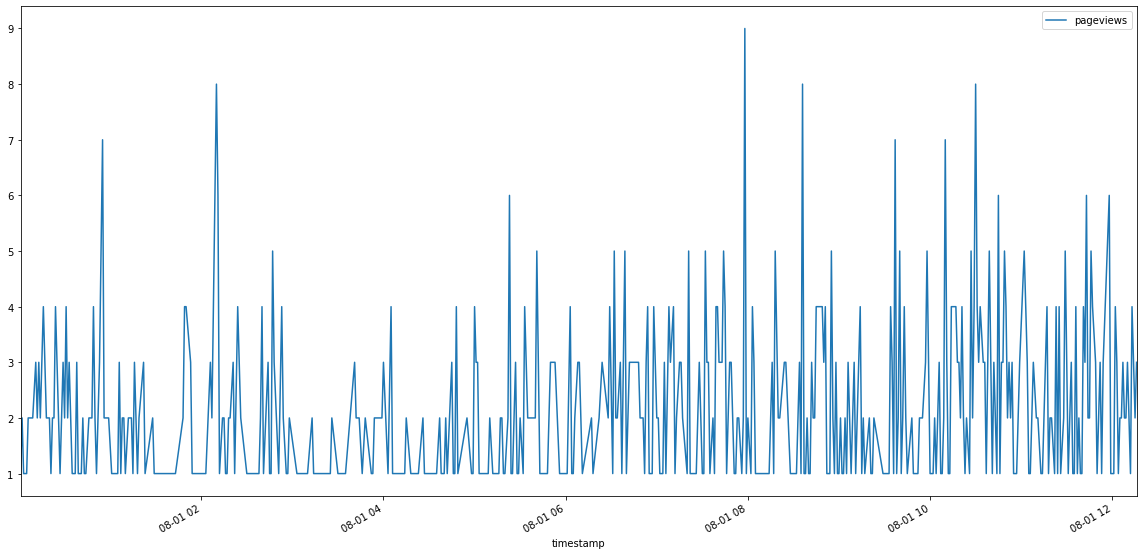

In [32]:
df[df['pagePath']=='/home'].head(500).plot(x='timestamp', y='pageviews', figsize=(20,10))
plt.show()